In [23]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [24]:
# Filtering for United Kingdom jobs and dropping rows with missing salary data

df_UK = df[df['job_country'] == 'United Kingdom'].dropna(subset=['salary_year_avg'])

In [25]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [26]:
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [27]:
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

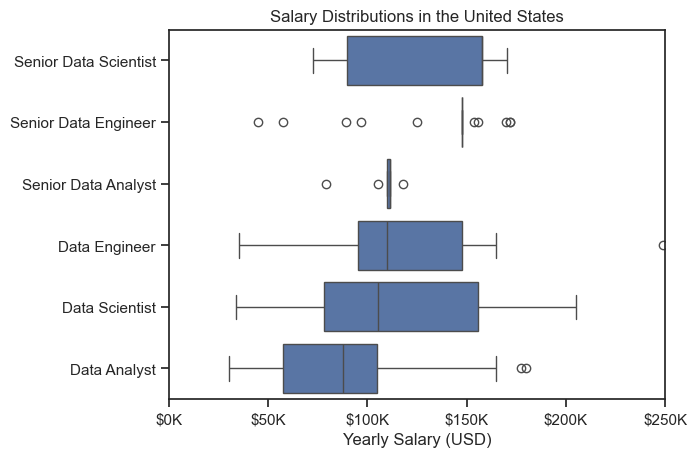

In [28]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order = job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Engineers

In [68]:
df_DE_US = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'United States')].copy()

df_DE_US = df_DE_US.dropna(subset = ['salary_year_avg'])

In [69]:
df_DE_US = df_DE_US.explode('job_skills')

In [70]:
df_DE_UK_top_pay = df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DE_UK_top_pay = df_DE_UK_top_pay.head(10)

df_DE_UK_top_pay

,count,median
job_skills,,
mongo,78,208114.0
vue,1,200000.0
solidity,1,192500.0
node,24,190000.0
ggplot2,2,176250.0
macos,2,172000.0
clojure,2,170866.5
atlassian,18,169860.0
rust,7,165000.0


In [71]:
df_DE_skills = df_DE_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_UK_top_pay.head(10)

df_DE_skills

,count,median
job_skills,,
mongo,78,208114.0
vue,1,200000.0
solidity,1,192500.0
node,24,190000.0
ggplot2,2,176250.0
macos,2,172000.0
clojure,2,170866.5
atlassian,18,169860.0
rust,7,165000.0


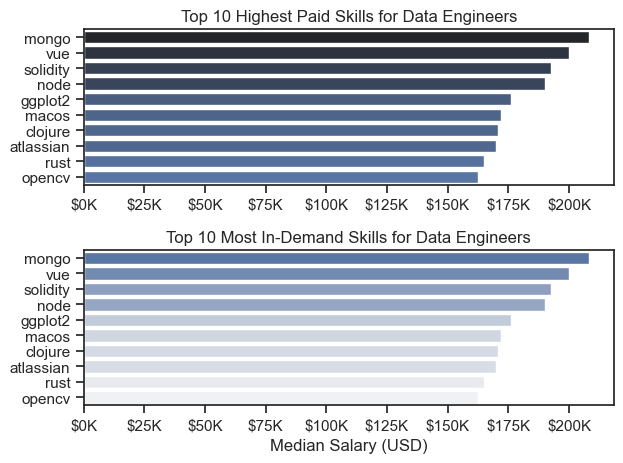

In [72]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DE_UK_top_pay, x='median', y=df_DE_UK_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Engineers')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DE_skills, x='median', y=df_DE_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Engineers')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()